In [1]:
#implementation of artifical neural network for combined prediction of DA and AA concentrations
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#load the data into a dataframe
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MachineLearning-Data.xlsx"
df = pd.read_excel(filepath)

#drop one of the useless column.
df =  df.drop(columns=['DA concentration'])

#split the data into features and target
X = df.drop(columns=['DA Concentration (uM)','AA Concentration (uM)'])
y = df[['DA Concentration (uM)', 'AA Concentration (uM)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features same as SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
#let's define our artificial neural network model
def ANN_model():
    model = Sequential()
    model.add(Dense(48, input_dim=X_test_scaled.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2))
    return model

#compile the model and print the summary
model = ANN_model()
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

c:\Users\Admin\.conda\envs\DataCamp\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010 (3.95 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 219516.0000 - val_loss: 379769.6562
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 231644.7969 - val_loss: 378577.3438
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 224927.1875 - val_loss: 376739.6562
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 191338.8281 - val_loss: 373832.6250
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 329040.0938 - val_loss: 369325.5000
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 150163.7344 - val_loss: 363630.6562
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 135834.8125 - val_loss: 356194.7500
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 275843.0625 - val_loss: 345287.1875
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 198115.6094 - val_loss: 331490.8125
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 199260.1250 - val_loss: 314398.9375
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 

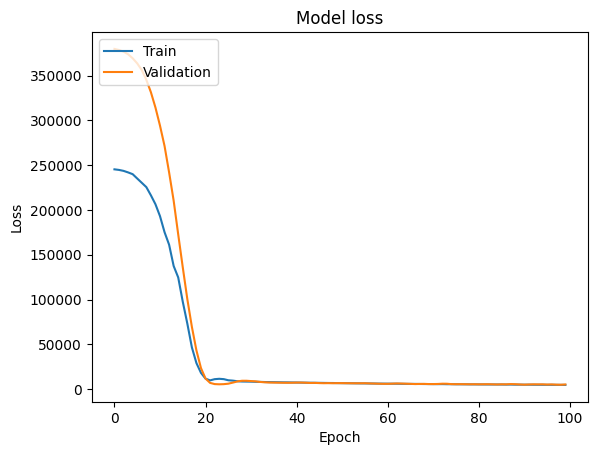

In [4]:
#train the model and plot the training history as training progresses
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [5]:
#make predictions on the test set
y_pred = model.predict(X_test_scaled)
#crete a dataframe of the actual and predicted values
df = pd.DataFrame({'Actual DA': y_test['DA Concentration (uM)'], 'Predicted DA': y_pred[:,0], 'Actual AA': y_test['AA Concentration (uM)'], 'Predicted AA': y_pred[:,1]})
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


,Actual DA,Predicted DA,Actual AA,Predicted AA
13,0,19.234638,1750,1707.977661
39,200,25.228861,200,410.537628
30,75,64.782448,0,-2.933228
45,30,55.759857,30,96.455406
17,10,72.001022,0,-15.565497
